In [4]:
import numpy as np
import shutil
from astropy.io import ascii, fits
from ants import absInt, fluxInt
import pyregion
import aplpy

from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms
from matplotlib.ticker import LogFormatter 
from matplotlib.colors import LogNorm


abSex = absInt.absint()
fl = fluxInt.fluxint()

get_ipython().magic(u'pylab inline')


rootDir = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/'
#Inputs
cubeDir = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/'
#cubeName = cubeDir+'M64_FA_UF-2deg_r0.5_HI.image.fits'

contDir = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/'
#contName = contDir+'M64_FA_UF-meq_2-MFS-image.fits'
contName = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/cont_16asec.fits'
contNameHighRes = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/M64_FA_UF_2-MFS-image.fits'

mom020asec = cubeDir+ 'MIAPP-t10_6_mom0_mult_mult_mult.fits'
opticalName = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/FornaxA_r_mosaic_small.fits'
FA_radeg = 50.673825
FA_decdeg = -37.206227
BeamRa = 50.694035
BeamDec = -37.222974

sysVel = 1760.

#Outputs
outDir = '/Users/maccagni/'
plotDir = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/'
specName = outDir+'M64-ctr-r0.5'
outPlot = plotDir+'H2H1ratio.pdf'
outPlot_hiOvh2 = plotDir+'H1OverH2_mom0.pdf'
outPlot_H1Cont = plotDir+'H1_mom0.pdf'
outPlot_H1Cont20asec = plotDir+'H1_mom020asec.pdf'

outPlot_H1ContSlice = plotDir+'H1_mom0Slice.pdf'
outPlot_H1ContSlice2 = plotDir+'H1_mom0Slice2.pdf'




print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''

Populating the interactive namespace from numpy and matplotlib
	+---------+
	 Inputs loaded
	+---------+


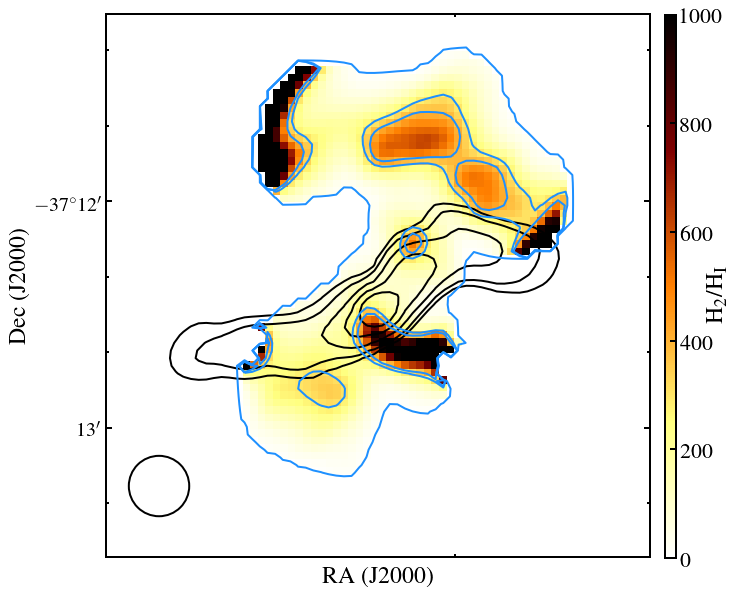

In [4]:
#-------------------------------#
# MeerKAT                       #
#-------------------------------#
import fluxInt
fint = fluxInt.flInt()
fint.rootdir = rootDir

a=rootDir+'H2H1ratio_16asec.fits'
b=rootDir+'H2H1ratio_16asec.fits'
c=contName
#a=imDir+'meer_an.fits'
#b=imDir+'meer_an_plot.fits'

datas,heads = fint.openFile(a)
fits.writeto(b,datas,heads,overwrite=True)
# initialize plotting parameters

#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.serif'          :'times',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 24,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 6,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 3,
          'xtick.minor.width'   : 1,
          'ytick.major.size'    : 6,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 3,
          'ytick.minor.width'   : 1, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
#a=imDir+'Meer_1030MHz.fits'


fig = plt.figure(figsize=(10, 10))

#f22 = fits.getdata(b, ext=0)

#img = plt.imshow(f22, cmap="afmhot",norm=LogNorm(vmin=1e-1, vmax=3e1))
#,exponent=4,vmin=1e-1,vmid=-1.e-1,vmax=3e1)
#plt.gca().set_visible(False5
#cax = plt.axes([0.905, 0.08, 0.015, 0.775])
#cbar = plt.colorbar(cax=cax)
#ax = cbar.ax
#ax.text(3.9,0.5,r'mJy beam$^{-1}$',rotation=90)

f22 = fits.getdata(b, ext=0)
img = plt.imshow(f22, cmap="afmhot_r",vmin=0,vmax=1000)
plt.gca().set_visible(False)
cax = plt.axes([0.912, 0.124, 0.015, 0.755])
cbar = plt.colorbar(cax=cax,ticks =  [0,200,400,600,800,1000],
                    orientation='vertical', format='%.1d')
#cbar.set_ticks([0,200,400,600,800,1000])
ax = cbar.ax
ax.text(3.9,0.5,r'H$_2$/H$_{\rm I}$',rotation=90)


FA_radeg = 50.673825
FA_decdeg = -37.204227
BeamRa = 50.694035
BeamDec = -37.220974
f1 = aplpy.FITSFigure(b, figure=fig)
f1.set_theme('publication')

f1.frame.set_linewidth(2)
#f1.show_colorscale(aspect='equal', cmap='afmhot',vmin=-3,vmax=7)

#f1.recenter(FA_radeg,FA_decdeg,width=0.98,height=0.98)
f1.recenter(FA_radeg,FA_decdeg-0.002,width=0.04,height=0.04)
f1.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'linear',vmin=0,vmax=1000)



f1.show_contour(c,levels=[5e-4,1e-3,3e-3,1e-2,3e-2], colors='black',lw=3)
f1.show_contour(b,levels=[10,300,400], colors='dodgerblue',lw=3)

f1.show_ellipses(BeamRa, BeamDec, 16./3600., 16./3600., angle=0, edgecolor='black',linewidth=2 )

#f1.set_title('1030 MHz')

#f1.show_colorbar()
#f1.colorbar.set_box([0.905, 0.112, 0.015, 0.8], box_orientation='vertical')
#f1.colorbar.set_frame_linewidth(1)
#f1.colorbar.set_pad(0.1)
#f1.colorbar.set_font( weight='book', 
##                      stretch='normal', family='serif', 
#                      style='normal', variant='normal')
#f1.colorbar.set_axis_label_text(r'H$_{2}$/HI')
#f1.colorbar.set_ticks([0,200,400,600,800,1000])

#f1.show_colorbar()
#f1.colorbar.hide()


f1.axis_labels.set_font( weight='book',size='medium', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('RA (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', size='small',
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(6)  # points
f1.ticks.set_linewidth(2)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'mJy beam$^{-1}$')
#f1.show_regions(rootDir+'inIms/regions/WL.reg')
#f1.show_regions(rootDir+'inIms/regions/ToT.reg')
#f1.show_regions(rootDir+'inIms/regions/EL.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean3.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean4.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean5.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean6.reg')

#f1.show_regions(rootDir+'inIms/regions/Wan0.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan1.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan2.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan3.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan4.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan5.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan6.reg')


#fig.tight_layout()

fig.savefig(outPlot,format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)

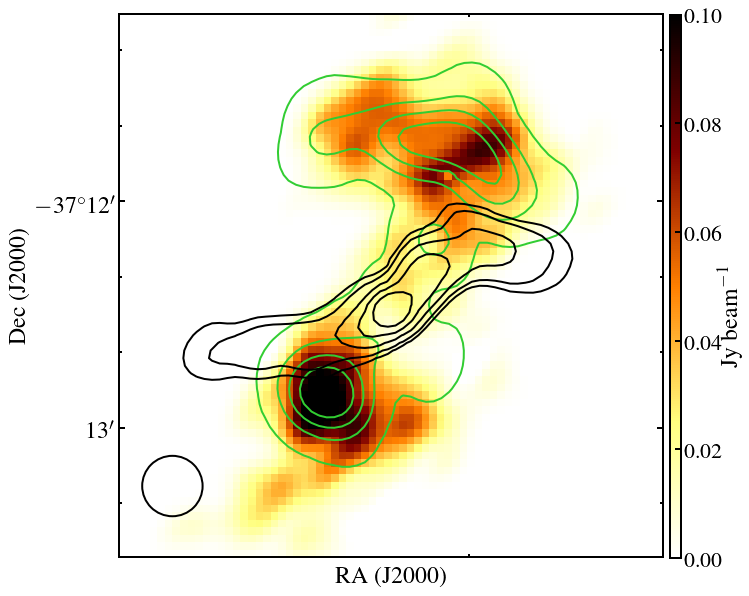

In [68]:
#-------------------------------#
# MeerKAT                       #
#-------------------------------#
#fint = fluxInt.fluxint()
#fint.rootdir = rootDir

a=rootDir+'HI_mom0_Jy.fits'
b=rootDir+'CO_mom0.fits'
c=contName
#a=imDir+'meer_an.fits'
#b=imDir+'meer_an_plot.fits'

#datas,heads = fint.openFile(a)
#fits.writeto(b,datas,heads,overwrite=True)
# initialize plotting parameters

#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.serif'          :'times',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 24,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 6,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 3,
          'xtick.minor.width'   : 1,
          'ytick.major.size'    : 6,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 3,
          'ytick.minor.width'   : 1, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
#a=imDir+'Meer_1030MHz.fits'


fig = plt.figure(figsize=(10, 10))


f22 = fits.getdata(a, ext=0)
img = plt.imshow(f22, cmap="afmhot_r",vmin=0,vmax=1e-1)
plt.gca().set_visible(False)
cax = plt.axes([0.9, 0.124, 0.015, 0.755])
cbar = plt.colorbar(cax=cax,ticks=[0,2e-2,4e-2,6e-2,8e-2,1e-1],
                    orientation='vertical', format='%.2f')
#cbar.set_ticks([0,200,400,600,800,1000])
ax = cbar.ax
ax.text(4.3,0.5,r'Jy beam$^{-1}$',rotation=90)

f1 = aplpy.FITSFigure(a, figure=fig)
f1.set_theme('publication')


f1.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'linear',vmin=0,vmax=1e-1)
f1.frame.set_linewidth(2)

#f1.show_colorscale(aspect='equal', cmap='afmhot',vmin=-3,vmax=7)

#f1.recenter(FA_radeg,FA_decdeg,width=0.98,height=0.98)
f1.recenter(FA_radeg,FA_decdeg-0.002,width=0.04,height=0.04)

f1.show_contour(b,levels=[1,8,16,25], colors='limegreen',lw=4,label='CO (2-1)')

f1.show_contour(c,levels=[5e-4,1e-3,3e-3,1e-2,3e-2], colors='black',lw=3,label=r'H$_{\rm I}$')
#f1.add_beam()
#f1.beam.show()
#f1.beam.set_corner('bottom left')
#f1.beam.set(edgecolor = 'black', facecolor = 'None', linewidth=1)

#f1.set_title('1030 MHz')

#f1.show_colorbar()
#f1.colorbar.set_box([0.905, 0.112, 0.015, 0.8], box_orientation='vertical')
#f1.colorbar.set_frame_linewidth(1)
#f1.colorbar.set_pad(0.1)
#f1.colorbar.set_font( weight='book', 
#                      stretch='normal', family='serif', 
#                      style='normal', variant='normal')
#f1.colorbar.set_axis_label_text(r'Jy beam$^{-1}$')
#f1.colorbar.set_ticks([0,2e-2,4e-2,6e-2,8e-2,1e-2])

#f1.show_colorbar()
#f1.colorbar.hide()

f1.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('RA (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(6)  # points
f1.ticks.set_linewidth(2)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'mJy beam$^{-1}$')
#f1.show_regions(rootDir+'inIms/regions/WL.reg')
#f1.show_regions(rootDir+'inIms/regions/ToT.reg')
#f1.show_regions(rootDir+'inIms/regions/EL.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean3.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean4.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean5.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean6.reg')

#f1.show_regions(rootDir+'inIms/regions/Wan0.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan1.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan2.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan3.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan4.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan5.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan6.reg')


f1.show_ellipses(BeamRa, BeamDec, 16./3600., 16./3600., angle=0, edgecolor='black',linewidth=2 )


#fig.tight_layout()

fig.savefig(outPlot_hiOvh2,
            format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)

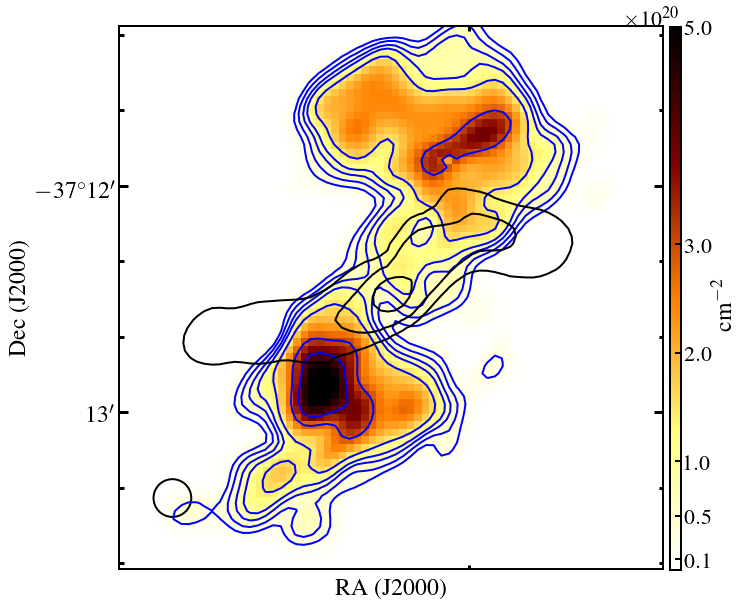

In [17]:
#-------------------------------#
# MeerKAT                       #
#-------------------------------#


a=rootDir+'HI_mom0.fits'
b=rootDir+'H2_mom0.fits'
c=contName
#a=imDir+'meer_an.fits'
#b=imDir+'meer_an_plot.fits'

#datas,heads = fint.openFile(a)
#fits.writeto(b,datas,heads,overwrite=True)
# initialize plotting parameters

#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.serif'          :'times',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 24,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 6,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 3,
          'xtick.minor.width'   : 1,
          'ytick.major.size'    : 6,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 3,
          'ytick.minor.width'   : 1, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
#a=imDir+'Meer_1030MHz.fits'


fig = plt.figure(figsize=(10, 10))

#f22 = fits.getdata(b, ext=0)

f22 = fits.getdata(a, ext=0)
img = plt.imshow(f22, cmap="afmhot_r",vmin=0,vmax=5e20)
plt.gca().set_visible(False)
cax = plt.axes([0.9, 0.124, 0.015, 0.755])
cbar = plt.colorbar(cax=cax,ticks=[1e19,5e19,1e20,2e20,3e20,5e20,1e21],
                    orientation='vertical')
#cbar.set_ticks([0,200,400,600,800,1000])
ax = cbar.ax
ax.text(3.9,0.5,r'cm$^{-2}$',rotation=90)

f1 = aplpy.FITSFigure(a, figure=fig)

f1.set_theme('publication')

f1.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'linear',vmin=0,vmax=5e20)
f1.frame.set_linewidth(2)


#f1.show_colorscale(aspect='equal', cmap='afmhot',vmin=-3,vmax=7)

#f1.recenter(FA_radeg,FA_decdeg,width=0.98,height=0.98)
f1.recenter(FA_radeg,FA_decdeg-0.002,width=0.04,height=0.04)
f1.show_contour(a,levels=[3e19,5e19,7.5e19,1e20,1.5e20,3e20,4e20], colors='blue',lw=3)

f1.show_contour(c,levels=[5e-4,3e-3,3e-2], colors='black',lw=2)
#f1.add_beam()
#f1.beam.show()
#f1.beam.set_corner('bottom left')
#f1.beam.set(edgecolor = 'black', facecolor = 'None', linewidth=1)

#f1.set_title('1030 MHz')

#f1.show_colorbar()
#f1.colorbar.set_box([0.905, 0.112, 0.015, 0.8], box_orientation='vertical')
#f1.colorbar.set_frame_linewidth(1)
#f1.colorbar.set_pad(0.1)
#f1.colorbar.set_font( weight='book', 
#                      stretch='normal', family='serif', 
#                      style='normal', variant='normal')
#f1.colorbar.set_axis_label_text(r'cm$^{-2}$')
#f1.colorbar.set_ticks([0,,100,200,400,600,800,1000])

#f1.show_colorbar()
#f1.colorbar.hide()

f1.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('RA (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(9)  # points
f1.ticks.set_linewidth(3)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

f1.show_ellipses(BeamRa, BeamDec, 10./3600., 10./3600., angle=0, edgecolor='black',linewidth=2 )


#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'mJy beam$^{-1}$')
#f1.show_regions(rootDir+'inIms/regions/WL.reg')
#f1.show_regions(rootDir+'inIms/regions/ToT.reg')
#f1.show_regions(rootDir+'inIms/regions/EL.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean3.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean4.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean5.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean6.reg')

#f1.show_regions(rootDir+'inIms/regions/Wan0.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan1.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan2.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan3.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan4.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan5.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan6.reg')
#f1.add_label(50.215,-37.102,'- ' ,color='red',horizontalalignment='left'  ,verticalalignment='center')
#f1.add_label(50.215,-37.102,'- NGC 1310' ,color='red',horizontalalignment='left'  ,verticalalignment='center')



#fig.tight_layout()

fig.savefig(outPlot_H1Cont,
            format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)

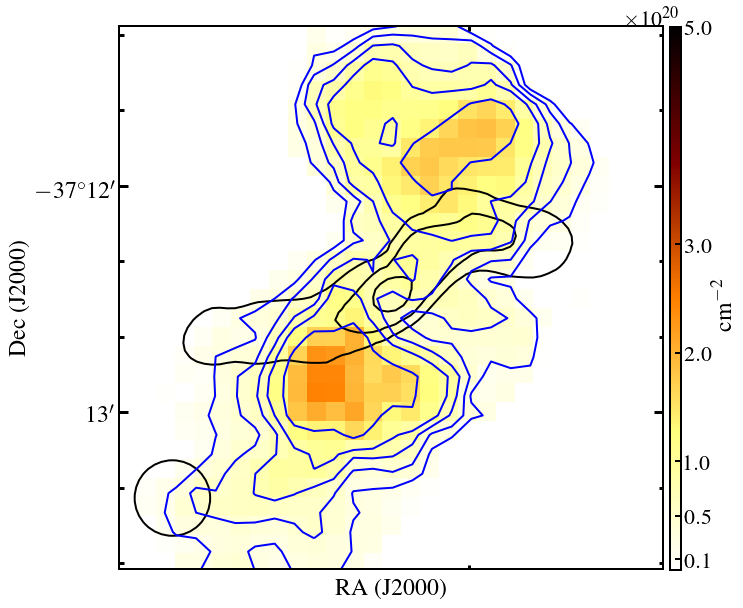

In [16]:
#-------------------------------#
# MeerKAT                       #
#-------------------------------#


a=mom020asec
c=contName
#a=imDir+'meer_an.fits'
#b=imDir+'meer_an_plot.fits'

#datas,heads = fint.openFile(a)
#fits.writeto(b,datas,heads,overwrite=True)
# initialize plotting parameters

#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.serif'          :'times',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 24,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 6,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 3,
          'xtick.minor.width'   : 1,
          'ytick.major.size'    : 6,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 3,
          'ytick.minor.width'   : 1, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
#a=imDir+'Meer_1030MHz.fits'


fig = plt.figure(figsize=(10, 10))

#f22 = fits.getdata(b, ext=0)

f22 = fits.getdata(a, ext=0)
img = plt.imshow(f22, cmap="afmhot_r",vmin=0,vmax=5e20)
plt.gca().set_visible(False)
cax = plt.axes([0.9, 0.124, 0.015, 0.755])
cbar = plt.colorbar(cax=cax,ticks=[1e19,5e19,1e20,2e20,3e20,5e20,1e21],
                    orientation='vertical')
#cbar.set_ticks([0,200,400,600,800,1000])
ax = cbar.ax
ax.text(3.9,0.5,r'cm$^{-2}$',rotation=90)

f1 = aplpy.FITSFigure(a, figure=fig)

f1.set_theme('publication')

f1.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'linear',vmin=0,vmax=5e20)
f1.frame.set_linewidth(2)


#f1.show_colorscale(aspect='equal', cmap='afmhot',vmin=-3,vmax=7)

#f1.recenter(FA_radeg,FA_decdeg,width=0.98,height=0.98)
f1.recenter(FA_radeg,FA_decdeg-0.002,width=0.04,height=0.04)

f1.show_contour(c,levels=[5e-4,3e-3,3e-2], colors='black',lw=2)
f1.show_contour(a,levels=[3e19,5e19,7.5e19,1e20,1.5e20,3e20,4e20], colors='blue',lw=3)



#f1.add_beam()
#f1.beam.show()
#f1.beam.set_corner('bottom left')
#f1.beam.set(edgecolor = 'black', facecolor = 'None', linewidth=1)

#f1.set_title('1030 MHz')

#f1.show_colorbar()
#f1.colorbar.set_box([0.905, 0.112, 0.015, 0.8], box_orientation='vertical')
#f1.colorbar.set_frame_linewidth(1)
#f1.colorbar.set_pad(0.1)
#f1.colorbar.set_font( weight='book', 
#                      stretch='normal', family='serif', 
#                      style='normal', variant='normal')
#f1.colorbar.set_axis_label_text(r'cm$^{-2}$')
#f1.colorbar.set_ticks([0,,100,200,400,600,800,1000])

#f1.show_colorbar()
#f1.colorbar.hide()

f1.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('RA (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(9)  # points
f1.ticks.set_linewidth(3)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

f1.show_ellipses(BeamRa, BeamDec, 20./3600., 20./3600., angle=0, edgecolor='black',linewidth=2 )


#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'mJy beam$^{-1}$')
#f1.show_regions(rootDir+'inIms/regions/WL.reg')
#f1.show_regions(rootDir+'inIms/regions/ToT.reg')
#f1.show_regions(rootDir+'inIms/regions/EL.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean3.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean4.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean5.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean6.reg')

#f1.show_regions(rootDir+'inIms/regions/Wan0.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan1.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan2.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan3.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan4.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan5.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan6.reg')
#f1.add_label(50.215,-37.102,'- ' ,color='red',horizontalalignment='left'  ,verticalalignment='center')
#f1.add_label(50.215,-37.102,'- NGC 1310' ,color='red',horizontalalignment='left'  ,verticalalignment='center')



#fig.tight_layout()

fig.savefig(outPlot_H1Cont20asec,
            format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)

In [ ]:
#-------------------------------#
# MeerKAT                       #
#-------------------------------#

a=rootDir+'HI_mom0.fits'
b=rootDir+'H2_mom0.fits'
c=contName
#a=imDir+'meer_an.fits'
#b=imDir+'meer_an_plot.fits'

#datas,heads = fint.openFile(a)
#fits.writeto(b,datas,heads,overwrite=True)
# initialize plotting parameters

#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.serif'          :'times',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 24,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 6,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 3,
          'xtick.minor.width'   : 1,
          'ytick.major.size'    : 6,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 3,
          'ytick.minor.width'   : 1, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
#a=imDir+'Meer_1030MHz.fits'


fig = plt.figure(figsize=(12, 12))

#f22 = fits.getdata(b, ext=0)

#img = plt.imshow(f22, cmap="afmhot",norm=LogNorm(vmin=1e-1, vmax=3e1))
#,exponent=4,vmin=1e-1,vmid=-1.e-1,vmax=3e1)
#plt.gca().set_visible(False)
#cax = plt.axes([0.905, 0.08, 0.015, 0.775])
#cbar = plt.colorbar(cax=cax)
#ax = cbar.ax
#ax.text(3.9,0.5,r'mJy beam$^{-1}$',rotation=90)

f1 = aplpy.FITSFigure(a, figure=fig)
f1.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'linear',vmin=0,vmax=5e20)
f1.frame.set_linewidth(2)

#f1.show_colorscale(aspect='equal', cmap='afmhot',vmin=-3,vmax=7)

#f1.recenter(FA_radeg,FA_decdeg,width=0.98,height=0.98)
f1.recenter(FA_radeg,FA_decdeg,width=0.04,height=0.04)

f1.show_contour(c,levels=[5e-4,1e-3,3e-3,1e-2,3e-2], colors='black',lw=2)
#f1.add_beam()
#f1.beam.show()
#f1.beam.set_corner('bottom left')
#f1.beam.set(edgecolor = 'black', facecolor = 'None', linewidth=1)

#f1.set_title('1030 MHz')

f1.show_colorbar()
#f1.colorbar.set_box([0.905, 0.112, 0.015, 0.8], box_orientation='vertical')
f1.colorbar.set_frame_linewidth(1)
f1.colorbar.set_pad(0.1)
f1.colorbar.set_font( weight='book', 
                      stretch='normal', family='serif', 
                      style='normal', variant='normal')
f1.colorbar.set_axis_label_text(r'cm$^{-2}$')
#f1.colorbar.set_ticks([0,,100,200,400,600,800,1000])

#f1.show_colorbar()
#f1.colorbar.hide()

f1.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('Ra (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='medium', 
                         stretch='semi-expanded', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(9)  # points
f1.ticks.set_linewidth(3)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

f1.show_ellipses(BeamRa, BeamDec, 16./3600., 16./3600., angle=0, edgecolor='black',linewidth=2 )


#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'mJy beam$^{-1}$')
#f1.show_regions(rootDir+'inIms/regions/WL.reg')
#f1.show_regions(rootDir+'inIms/regions/ToT.reg')
#f1.show_regions(rootDir+'inIms/regions/EL.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean3.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean4.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean5.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean6.reg')

#f1.show_regions(rootDir+'inIms/regions/Wan0.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan1.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan2.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan3.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan4.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan5.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan6.reg')

f1.show_regions(rootDir+'sliceJets.reg')
f1.show_regions(rootDir+'sliceNarc.reg')

f1.show_regions(rootDir+'sliceSarc.reg')

f1.show_regions(rootDir+'sliceMajor.reg')


fig.tight_layout()

fig.savefig(outPlot_H1ContSlice,format='png',overwrite=True)

In [ ]:
import fluxInt
fint = fluxInt.flInt()
fint.rootdir = rootDir

a=rootDir+'H2H1ratio_16asec.fits'
b=rootDir+'H2H1ratio_16asec.fits'
c=contNameHighRes
d=opticalName
#a=imDir+'meer_an.fits'
#b=imDir+'meer_an_plot.fits'

datas,heads = fint.openFile(a)
fits.writeto(b,datas,heads,overwrite=True)
# initialize plotting parameters

#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.serif'          :'times',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 13.5,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 12,
          'ytick.labelsize'     : 12, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 6,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 3,
          'xtick.minor.width'   : 1,
          'ytick.major.size'    : 6,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 3,
          'ytick.minor.width'   : 1, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)
#plot image
#a=imDir+'Meer_1030MHz.fits'


fig = plt.figure(figsize=(12, 12))

#f22 = fits.getdata(b, ext=0)

#img = plt.imshow(f22, cmap="afmhot",norm=LogNorm(vmin=1e-1, vmax=3e1))
#,exponent=4,vmin=1e-1,vmid=-1.e-1,vmax=3e1)
#plt.gca().set_visible(False)
#cax = plt.axes([0.905, 0.08, 0.015, 0.775])
#cbar = plt.colorbar(cax=cax)
#ax = cbar.ax
#ax.text(3.9,0.5,r'mJy beam$^{-1}$',rotation=90)

FA_radeg = 50.673825
FA_decdeg = -37.204227
BeamRa = 50.694035
BeamDec = -37.220974
f1 = aplpy.FITSFigure(d, figure=fig)
f1.show_colorscale(aspect='equal', cmap='Greys',stretch = 'log',vmin=1.e-10,vmid=-1.9e-10,vmax=1.5e-9)
f1.frame.set_linewidth(2)
#f1.show_colorscale(aspect='equal', cmap='afmhot',vmin=-3,vmax=7)

#f1.recenter(FA_radeg,FA_decdeg,width=0.98,height=0.98)
f1.recenter(FA_radeg,FA_decdeg,width=0.06,height=0.06)


f1.show_contour(c,levels=[5e-4,1e-3,3e-3,1e-2,3e-2], colors='white',lw=2)
f1.show_contour(b,levels=[100, 200, 400], colors='c',lw=2)

#f1.show_ellipses(BeamRa, BeamDec, 16./3600., 16./3600., angle=0, edgecolor='black',linewidth=2 )

#f1.set_title('1030 MHz')

#f1.show_colorbar()
#f1.colorbar.set_box([0.905, 0.112, 0.015, 0.8], box_orientation='vertical')
#f1.colorbar.set_frame_linewidth(1)
#f1.colorbar.set_pad(0.1)
#f1.colorbar.set_font( weight='medium', 
#                      stretch='semi-expanded', family='serif', 
#                      style='normal', variant='normal')
#f1.colorbar.set_axis_label_text(r'H$_{2}$/HI')
#f1.colorbar.set_ticks([0,200,400,600,800,1000])

#f1.show_colorbar()
#f1.colorbar.hide()

f1.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('Ra (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='medium', 
                         stretch='semi-expanded', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(9)  # points
f1.ticks.set_linewidth(3)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()



fig.tight_layout()

f1.show_regions(rootDir+'sliceJets.reg')
f1.show_regions(rootDir+'sliceNarc.reg')

f1.show_regions(rootDir+'sliceSarc.reg')

f1.show_regions(rootDir+'sliceMajor.reg')


fig.tight_layout()

fig.savefig(outPlot_H1ContSlice2,format='png',overwrite=True)